In [ ]:
霍夫变换简单步骤：
1、先选定识别形状的种类
2、投影坐标
3、寻找交点识别形状

In [ ]:
1、识别线：
把其映射到极坐标系中（避免竖线斜率等于无穷的问题），出现一个高频交点
2、识别圆：
变成了3个自由度，要知道圆的半径是多少
映射到另一个坐标

In [ ]:
模板匹配
每个物品高度相似高度一致的情况使用的多
计算模板和图像的平均差or绝对误差

In [ ]:
一些不足：
模板匹配的不足：对图像进行平移旋转缩放等情况时，干扰性不强，亮度也会有影响

In [ ]:
代码实现

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io as io
from skimage import draw


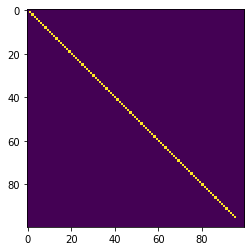

In [5]:
#霍夫变换
img=np.zeros([100,100])
h,w=draw.line(1,1,95,95)
img[h,w]=1
plt.imshow(img)

(284, 180)


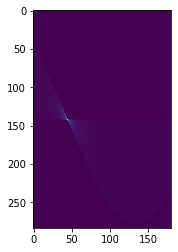

In [8]:
import skimage.transform as transform#霍夫变换的模块

h,theta,d=transform.hough_line(img)#霍夫变换识别线
print(h.shape)
plt.imshow(h)

(9, 200, 200)
1.000000000000004


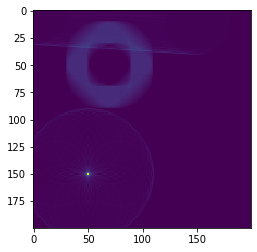

In [21]:
img=np.zeros([200,200])
#划线
h,w=draw.line(1,1,10,150)
img[h,w]=1
#画圆
h,w=draw.circle_perimeter(150,50,30)
img[h,w]=1
#画矩形
img[40:60,60:80]=1
plt.imshow(img)
#检测圆
radii=np.arange(5,50,5)
circle=transform.hough_circle(img,radii)
print(circle.shape)#(9, 200, 200) 识别了九次
plt.imshow(circle[5,:,:])
print(np.max(circle[5,:,:]))

In [ ]:
#模板匹配

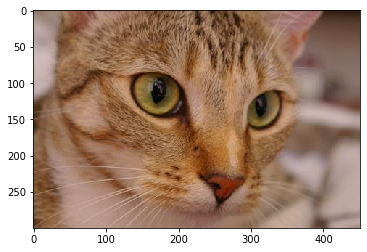

In [42]:
import skimage.feature as feature
img=io.imread('data/cat.jpg')
plt.imshow(img)

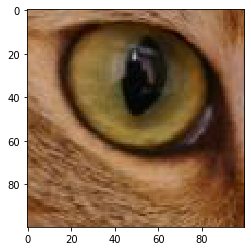

In [44]:
#制作模板
temple=img[80:180,120:220]
plt.imshow(temple)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


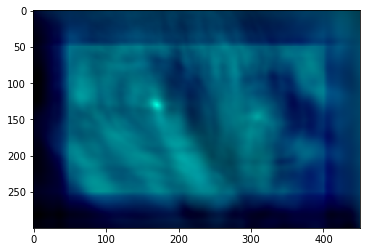

In [45]:
#匹配
res=skimage.feature.match_template(img,temple,pad_input=True,mode="constant",constant_values=0)

plt.imshow(res)


In [46]:
print(np.max(res))

0.999999999999998


In [51]:
index=np.where(res==np.max(res))
print(index)

(array([130], dtype=int64), array([170], dtype=int64), array([1], dtype=int64))


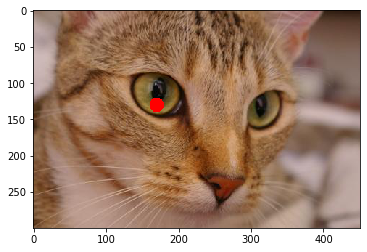

In [50]:
index=np.where(res==np.max(res))
h,w=skimage.draw.circle(index[0][0],index[1][0],10)
skimage.draw.set_color(img,[h,w],[255,0,0])
plt.imshow(img)